In [ ]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.0 MB/s eta 0:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

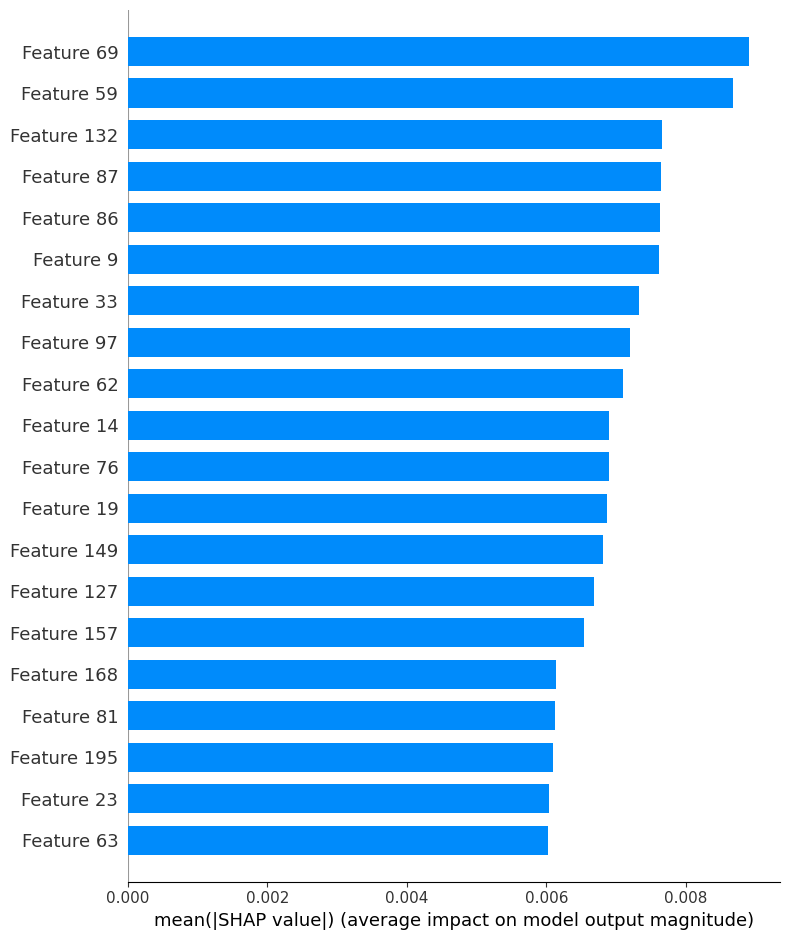

In [ ]:
#SHAP
#!pip install shap
import shap
import pickle

# Carregar o modelo do arquivo
with open('modeloGB.pkl', 'rb') as file:
    model = pickle.load(file)

with open('X_trainGB.pickle', 'rb') as file:
    X_train = pickle.load(file)

with open('X_testGB.pickle', 'rb') as file:
    X_test = pickle.load(file)


# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar a importância das features para a primeira classe como exemplo
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

In [ ]:
import numpy as np

important_features_index = np.argsort(-np.abs(np.array(shap_values).mean(0)).mean(0))[:10]

# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, important_features_index]
X_test_selected = X_test[:, important_features_index]

In [ ]:
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
dataset = dataset.drop('DOI', axis=1)


nomes_das_colunas = dataset.columns[important_features_index]

print("Nomes das colunas correspondentes:", nomes_das_colunas.tolist())

lista_classes = model.classes_
#print(lista_classes)

#primeira rodada SHAP Nomes das colunas correspondentes: ['electronegativity_ghosh_soma', 'vel_of_sound_soma',
#'poissons_ratio_desvio', 'atomic_ea_media', 'supercond_temp_maximo', 'atomic_spacegroupnum_desvio',
#'atomic_orbital_radii_soma', 'brinell_hardness_desvio', 'entropia-oxidos_media', 'coeff_of_lte_maximo']

Nomes das colunas correspondentes: ['brinell_hardness_media', 'covalent_rad_desvio', 'atomic_radius_desvio', 'atomic_en_paul_soma', 'youngs_mod_soma', 'entropia-oxidos_minimo', 'Entropia_maxima', 'vickers_hardness_maximo', 'atomic_radius_soma', 'brinell_hardness_soma']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



with open('y_trainGB.pickle', 'rb') as file:
    y_train = pickle.load(file)

################################################################################# Tuning hiperparameters

#Implementar gradient Booting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

param_grid = {

        'loss' : ['log_loss'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'max_features' : ['sqrt', 'log2'],
        'max_leaf_nodes' : [7, 9,12,14, 16],
        'n_estimators' : [50,100,200,500],
        'max_depth' : [3,5,7,9]

  }

modelGB = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator = modelGB, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)



grid_search.fit(X_train_selected, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
{'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 50}


In [ ]:
with open('X_test_selected.pickle', 'wb') as f:
  pickle.dump(X_test_selected, f)

with open('X_train_selected.pickle', 'wb') as f:
  pickle.dump(X_train_selected, f)

with open('y_testGB.pickle', 'rb') as file:
    y_test = pickle.load(file)

In [ ]:
l=0
a=0
while l< 200:

  modelGB = GradientBoostingClassifier(
        criterion='squared_error', loss= 'log_loss', max_depth= 9,
        max_features= 'log2', max_leaf_nodes= 9, n_estimators= 50

    )

  modelGB.fit(X_train_selected,y_train)


  x = accuracy_score(y_test, modelGB.predict(X_test_selected), sample_weight=None)
  print(float(x))

  if x > a:
    a = x
    k = modelGB

  l = l +1

0.75
0.75
0.7222222222222222
0.75
0.7222222222222222
0.7222222222222222
0.7777777777777778
0.75
0.7777777777777778
0.7222222222222222
0.7222222222222222
0.75
0.7222222222222222
0.7222222222222222
0.7222222222222222
0.7777777777777778
0.75
0.75
0.7222222222222222
0.75
0.75
0.7777777777777778
0.7777777777777778
0.75
0.75
0.7222222222222222
0.7777777777777778
0.75
0.7777777777777778
0.7222222222222222
0.7777777777777778
0.75
0.75
0.7222222222222222
0.7222222222222222
0.75
0.7222222222222222
0.75
0.7777777777777778
0.75
0.75
0.75
0.75
0.75
0.75
0.7777777777777778
0.75
0.75
0.7222222222222222
0.75
0.75
0.75
0.7777777777777778
0.7222222222222222
0.7222222222222222
0.75
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.7777777777777778
0.75
0.7222222222222222
0.7777777777777778
0.7777777777777778
0.7222222222222222
0.75
0.7777777777777778
0.7777777777777778
0.6944444444444444
0.75
0.75
0.75
0.7777777777777778
0.75
0.75
0.7222222222222222
0.75
0.75
0.7777777777777778
0.75
0.75
0.72222

In [ ]:
x = accuracy_score(y_test, k.predict(X_test_selected), sample_weight=None)
print(float(x))

0.7777777777777778


In [ ]:
with open('modeloGB_78.pickle', 'wb') as f:
  pickle.dump(k, f)

In [1]:
#Estatisticas

import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Átomos', axis=1)
dataset = dataset.drop('DOI', axis=1)

# Caminho para os arquivos pickle
path_to_X_train = 'X_trainGB.pickle'
path_to_X_test = 'X_testGB.pickle'
path_to_model = 'modeloGB_78.pickle'
path_to_y_test = 'y_testGB.pickle'

# Carregar X_test
with open(path_to_X_train, 'rb') as file:
    X_train = pickle.load(file)


with open(path_to_X_test, 'rb') as file:
    X_test = pickle.load(file)

# Carregar modelo
with open(path_to_model, 'rb') as file:
    model = pickle.load(file)

# Carregar y_test
with open(path_to_y_test, 'rb') as file:
    y_test = pickle.load(file)



In [2]:
nomes_das_colunas = ['brinell_hardness_media', 'covalent_rad_desvio', 'atomic_radius_desvio', 'atomic_en_paul_soma', 'youngs_mod_soma', 'entropia-oxidos_minimo', 'Entropia_maxima', 'vickers_hardness_maximo', 'atomic_radius_soma', 'brinell_hardness_soma']
column_indices = [dataset.columns.get_loc(name) for name in nomes_das_colunas]

# Exibir os índices
print(column_indices)



# Selecionar os dados apenas com as features importantes
X_train_selected = X_train[:, column_indices]
X_test_selected = X_test[:, column_indices]

[52, 65, 36, 13, 135, 194, 158, 130, 34, 51]


In [3]:
print(accuracy_score(y_test, model.predict(X_test_selected)))

0.7777777777777778


In [4]:
X_test = X_test_selected.copy()
X_train= X_train_selected.copy()

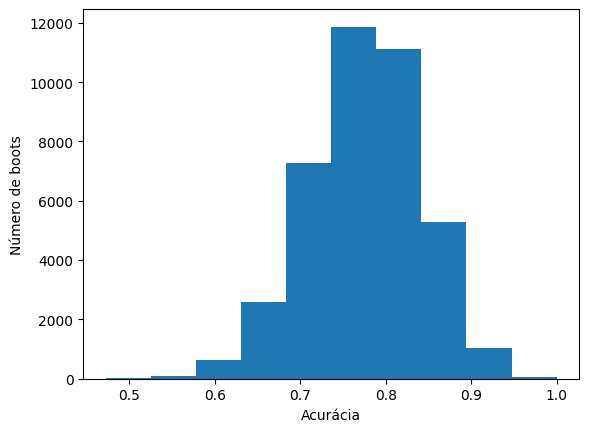

Intervalo de confiança : [0.6388888888888888,0.9166666666666666]
Acurácia 'real' do modelo performada no teste : 0.7777777777777778


In [5]:
import random
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Intervalo de confiança da acurácia

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1


  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):

  return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)


# calcula a distribuição dos boots

numero_boots = 40001
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots)
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show()

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

In [6]:


# Exibir as classes possíveis
classes_possiveis = model.classes_



# Duas listas fornecidas
list1 = y_test
list2 = classes_possiveis

# Eliminando elementos de list2 que não estão em list1
filtered_list2 = [item for item in list2 if item in list1]

# Exibindo a lista filtrada
print(filtered_list2)

['fluorite', 'monoclinic', 'multiphase', 'perovskite', 'pyrochlore', 'spinel']


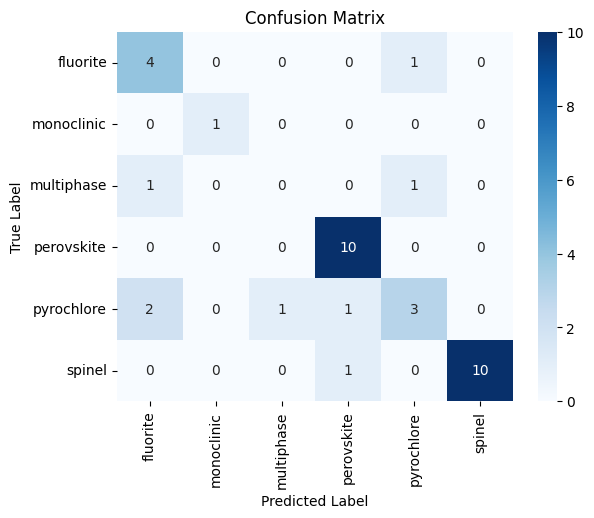

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'model' é o seu modelo treinado e 'X_test', 'y_test' são seus dados de teste
# Primeiro, você precisa fazer previsões usando o seu conjunto de teste
y_pred = model.predict(X_test)

# Gere a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtenha os nomes das classes
class_names = filtered_list2

# Para melhor visualização, você pode usar o Seaborn para plotar a matriz de confusão
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


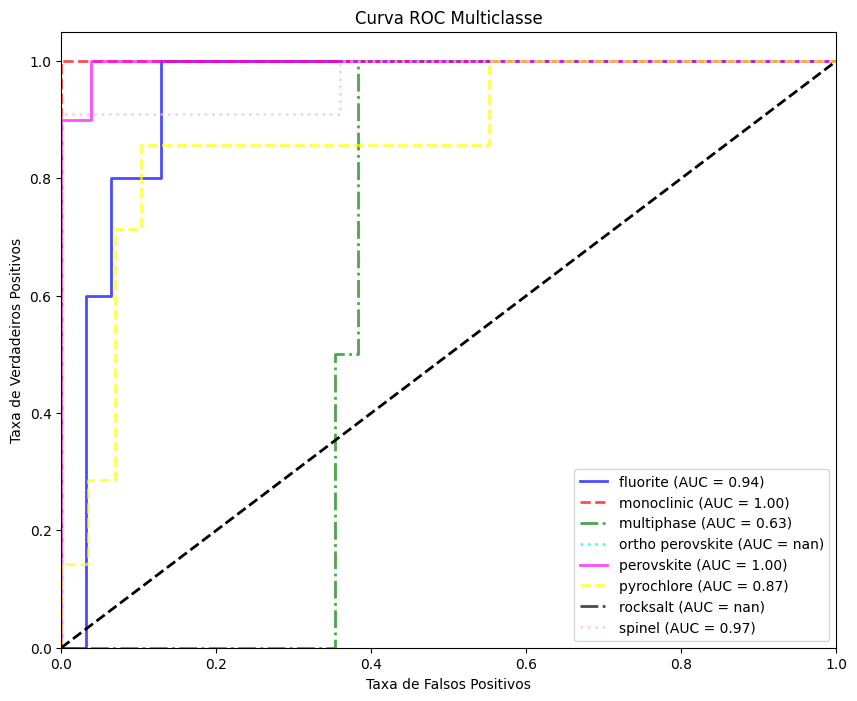

In [8]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Supondo que y_test já esteja disponível e não seja binário
# Se y_test já for binário (em formato one-hot), você pode pular esta etapa
# Binarizar os rótulos em uma configuração um contra todos
classes = model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Prever probabilidades. Certifique-se de que seu modelo tem um método `predict_proba`
y_score = model.predict_proba(X_test)

# Computar ROC curve e ROC area para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Associar os nomes das classes binarizadas
class_labels = model.classes_

# Garantir que class_labels corresponde às classes
assert len(class_labels) == len(classes), "O número de class_labels deve corresponder ao número de classes."

# Plot da curva ROC para cada classe
colors = cycle(['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightblue', 'gray', 'orange', 'purple'])
linestyles = cycle(['-', '--', '-.', ':'])
plt.figure(figsize=(10, 8))
for i, (color, linestyle) in zip(range(n_classes), zip(colors, linestyles)):
    plt.plot(fpr[i], tpr[i], color=color, linestyle=linestyle, lw=2, alpha=0.7,
             label='{0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Multiclasse')
plt.legend(loc="lower right")
plt.show()


In [9]:
#SHAP
!pip install shap==0.44.1
import shap
import pickle

# Usar KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calcular SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.1 MB/s eta 0:00:00


  0%|          | 0/36 [00:00<?, ?it/s]

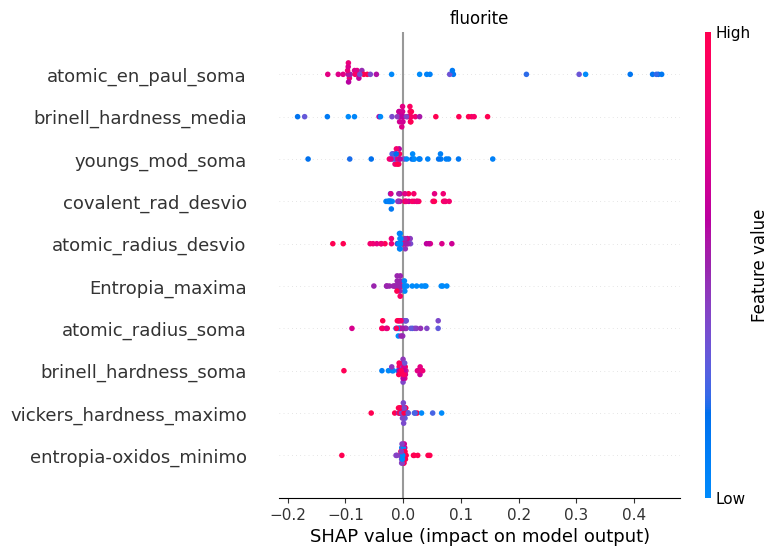

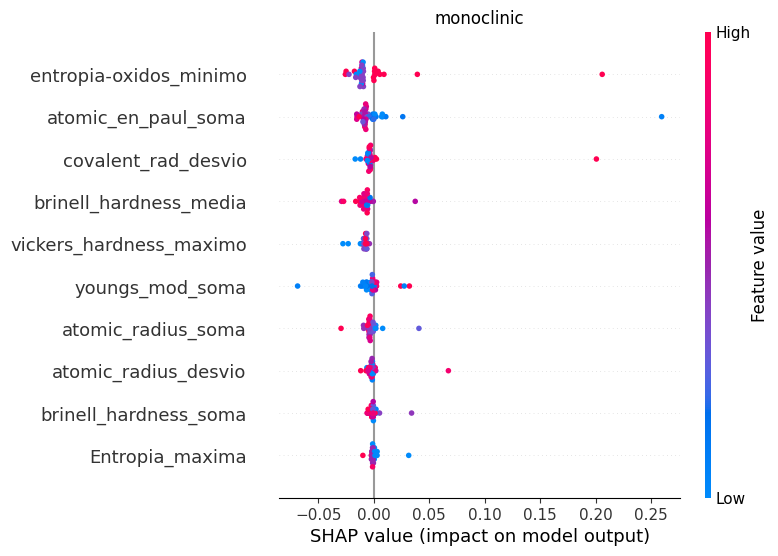

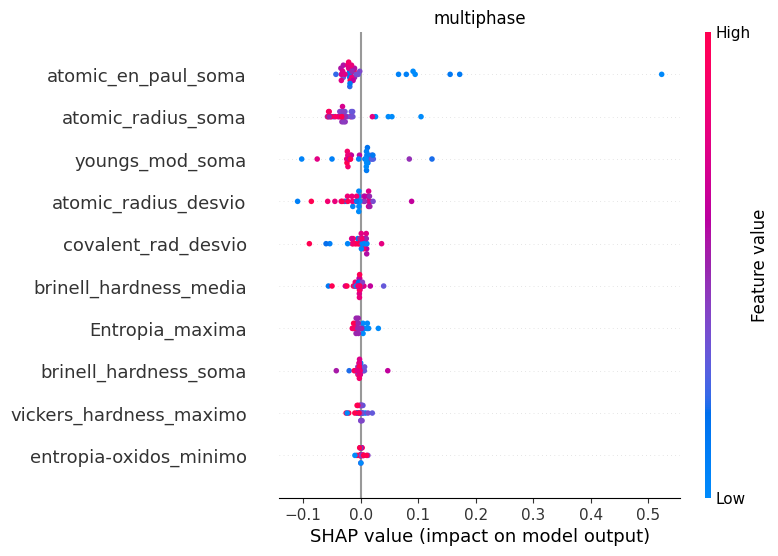

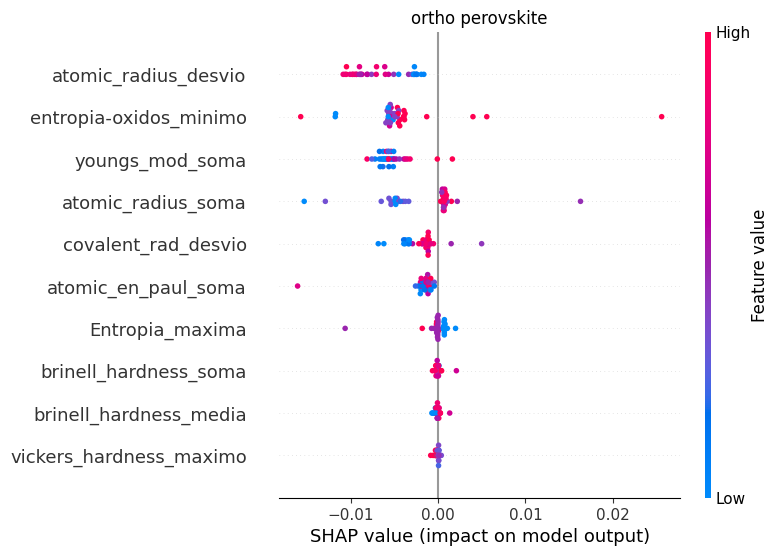

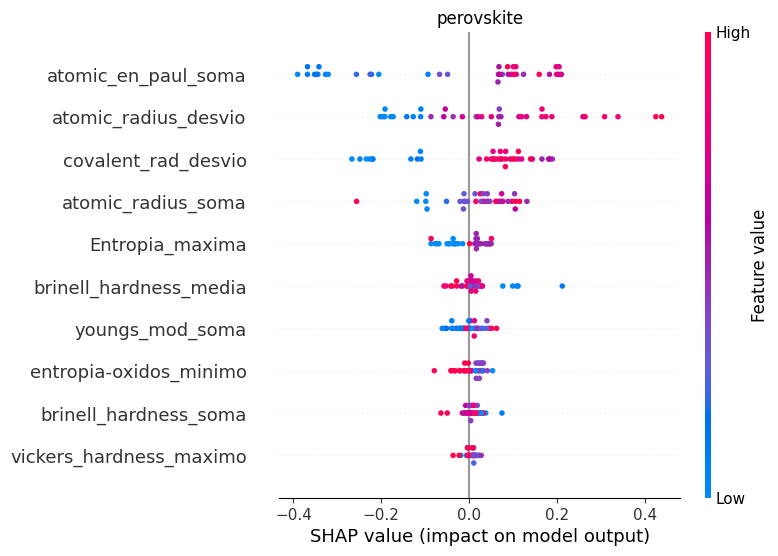

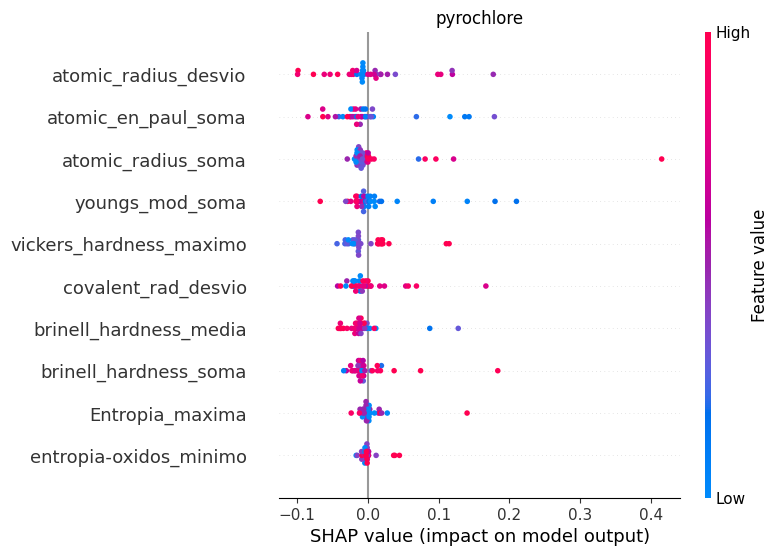

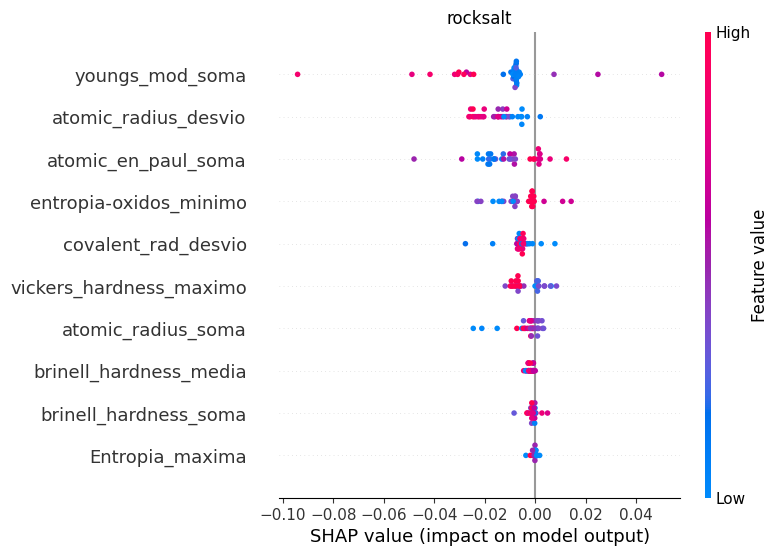

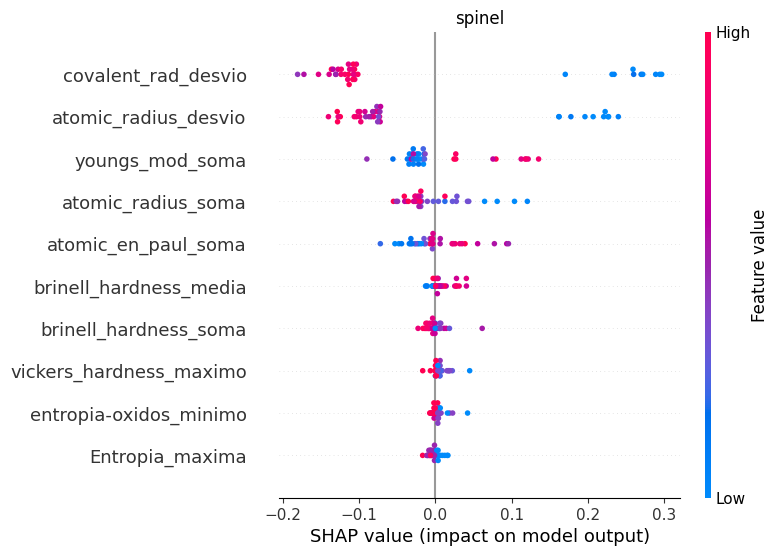

In [10]:
import matplotlib.pyplot as plt

feature_names  = nomes_das_colunas


lista_classes = model.classes_


# Visualizar a importância das features para a primeira classe como exemplo
count = 0
while len (shap_values)>count:

  shap.summary_plot(shap_values[count], X_test, plot_type="dot", feature_names = feature_names, show = False)
  plt.title(lista_classes[count])
  plt.show()

  count = count +1